import the data 

In [12]:

# Import all needed libraries and sublibraries

import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras
import matplotlib.pyplot as graph

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt

read the data 

In [13]:
df1 = pd.read_csv('X_data.csv')
df2 = pd.read_csv('Y_data.csv')
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size = 0.2)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
print(df1.head())
print(df2.head())

   17.99  10.38   122.8    1001   0.1184   0.2776  0.3001   0.1471  0.2419  \
0  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
2  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
3  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   
4  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578  0.08089  0.2087   

   0.07871   ...     25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  \
0  0.05667   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
1  0.05999   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
2  0.09744   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
3  0.05883   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   
4  0.07613   ...     15.47  23.75  103.40   741.6  0.1791  0.5249  0.5355   

   0.2654  0.4601   0.1189  
0  0.1860  0.2750  0.08902  
1  0.2430 

In [14]:
# define our model 
model = Sequential()

# add layers to our model, as our input has 30 features, we try relu as our activation function, and try 20 as our number of neurons in the layer
model.add(Dense(20,input_shape = (30,),activation = 'relu'))
# for our output, we will return one feature, try sigmoid as our activation function 
model.add(Dense(1, activation = 'sigmoid'))

# compile our model, use the binary_crossentropy as our cost function and Adam as optimizer
model.compile(loss ='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [15]:
# train our model with the training data set, then we use 10% of it as validation set 
training = model.fit(X_train, y_train, epochs = 200, validation_split = 0.1,verbose = 0)

print('training finished')
print('Training Evaluation: loss = %0.3f, accuracy = %0.2f%%'
      %(training.history['loss'][-1], 100 * training.history['accuracy'][-1]))

training finished
Training Evaluation: loss = 0.008, accuracy = 100.00%


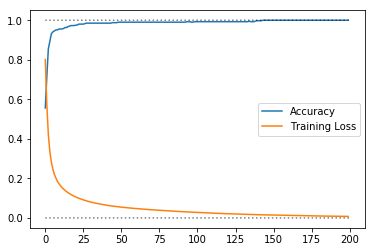

In [16]:
# we graph the accuracy and training loss during the training 
accuracy, = graph.plot(training.history['accuracy'],label = 'Accuracy')
training_loss, = graph.plot(training.history['loss'],label = 'Training Loss')


graph.legend(handles = [accuracy,training_loss])
loss = np.array(training.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

testing the model

In [19]:
evaluation = model.evaluate(X_test, y_test, verbose=0)
### evaluate the performance of our model on the test data 

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100*evaluation[1]))

Test Set Evaluation: loss = 0.136990, accuracy = 96.49


In [21]:
# randomly create a new data to predict whether it is a breast cancer
new_sample = [20.00,15.52,134,1221,0.1192,0.2800,0.5001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]
predicted = model.predict(np.array([new_sample]))
print('Breast cancer prediction for %s:' %(new_sample))
###

print(np.around(predicted[0],2))
print('breast cancer %s, with %i%% certainty.' %(np.argmax(predicted), np.round(100 * predicted[:, np.argmax(predicted)][0])))

Breast cancer prediction for [20.0, 15.52, 134, 1221, 0.1192, 0.28, 0.5001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]:
[1.]
breast cancer 0, with 100% certainty.
